In [ ]:
pip install sounddevice


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  Secured audio signal and voice message transmission using hybrid algorithm

In [ ]:
!apt-get install libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0
!pip install pyaudio


Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libasound2-dev' instead of 'libasound-dev'
libportaudio2 is already the newest version (19.6.0-1build1).
libportaudiocpp0 is already the newest version (19.6.0-1build1).
portaudio19-dev is already the newest version (19.6.0-1build1).
libasound2-dev is already the newest version (1.2.2-2.1ubuntu2.5).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install AES

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Crypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 KB 9.7 MB/s eta 0:00:00


In [ ]:
!pip install Crypto.Cipher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install Crypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import math
import sounddevice as sd
import random
import string

creating a .wav file with riff header

In [ ]:
import wave

# Set the parameters for the new WAV file
num_channels = 1
sample_width = 2  # 16-bit samples
sampling_rate = 44100  # 44.1 kHz
num_frames = 0  # Set to 0 to allow writing of an unspecified number of frames
compression_type = 'NONE'
compression_name = 'not compressed'

# Create a new WAV file with a valid RIFF header
with wave.open('output_file.wav', 'wb') as wav_file:
    wav_file.setparams((num_channels, sample_width, sampling_rate, num_frames, compression_type, compression_name))
    wav_file.writeframes(b'RIFF----WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00'
                         b'\x44\xac\x00\x00\x88\x58\x01\x00\x02\x00\x10\x00data\x00\x00\x00\x00')


Giving input for AES

Text(0.5, 1.0, 'Original Audio Plot')

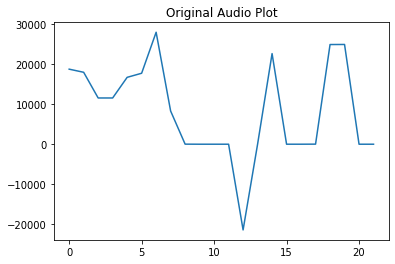

In [ ]:
fs, data = wavfile.read('output_file.wav')
plt.plot(data) # fs = sampling frequency = 44.1kHz
plt.title("Original Audio Plot")

In [ ]:
import random

Generation of key using AES

In [ ]:
AES_KEY = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))
AES_IV = ''.join(random.choice(string.ascii_uppercase + string.ascii_lowercase + string.digits) for x in range(16))

In [ ]:
print("AES Key is ", AES_KEY)
print("AES Initialization vector is ", AES_IV)

AES Key is  Pw1iOaLMLGJNHPt6
AES Initialization vector is  fBwLocf7ukcxracl


In [ ]:
import binascii,os

def aes_encrypt(plaintext):
    key = "00112233445566778899aabbccddeeff"
    iv = os.urandom(16)
    aes_mode = AES.MODE_CBC
    obj = AES.new(key, aes_mode, iv)
    ciphertext = obj.encrypt(plaintext)
    return ciphertext

In [ ]:
import codecs
import os


In [ ]:
pip install pycryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Crypto.Cipher import AES

Encryption using AES

In [ ]:

AES_KEY = "Pw1iOaLMLGJNHPt6"
AES_IV = os.urandom(16)  # Generate a new 16-byte IV

contents = "output_file.wav"
contents_bytes = contents.encode("utf-8")

encryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV)

encrypted_audio = encryptor.encrypt(contents_bytes)

In [ ]:
with open('encrypted_audio_file.wav', 'wb') as fd:
 fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated")

A file titled 'encrypted_audio_file.wav' is generated


In [ ]:
with open('encrypted_audio_file.wav', 'rb') as fd:
 contents = fd.read()
 print(contents)

b'u\x82\xa2\x08\xcdI\x1a\xca\xe1\xb3\xd9\xda\xed\xbf\x8e'


In [ ]:
fs, data = wavfile.read('output_file.wav')
k = np.asarray(data, dtype = np.int32)
print(k)

[ 18770  17990  11565  11565  16727  17750  28006   8308     16      0
      1      1 -21436      0  22664      1      2     16  24932  24948
      0      0]


Generating pubic and private key

In [ ]:
p1 = int(input("Enter first prime number: "))
p2 = int(input("Enter second prime number: "))
p3 = int(input("Enter third prime number: "))
p4 = int(input("Enter forth prime number: "))
n = p1*p2*p3*p4
print("n = p1*p2 = ",n)
e = int(input("Enter a small, odd number, co-prime with n: "))
K = int(input("Enter value of k:"))
phi = (p1-1)*(p2-1)*(p3-1)*(p4-1)
print("phi = ",phi)
d = int((K*phi+1)/e)
print("d= ",d)
public_key = n,e
private_key = n,d
print("Public Key = ", public_key)
print("Private Key = ",private_key)

Enter first prime number: 2
Enter second prime number: 3
Enter third prime number: 5
Enter forth prime number: 7
n = p1*p2 =  210
Enter a small, odd number, co-prime with n: 3
Enter value of k:5
phi =  48
d=  80
Public Key =  (210, 3)
Private Key =  (210, 80)


write the encrypted file into an audio file

Text(0.5, 1.0, 'Encrypted Audio Plot')

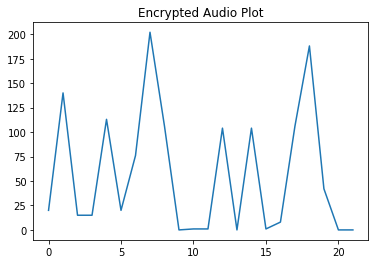

In [ ]:
encrypted=[]
for i in data:
 encrypted.append((i**e)%n)
#encrypted = (data**e)%n
#print(encrypted)
plt.plot(encrypted)
plt.title("Encrypted Audio Plot")

In [ ]:
with open('encrypted_audio_file.wav', 'wb') as fd:
 fd.write(encrypted_audio)
print("A file titled 'encrypted_audio_file.wav' is generated")

A file titled 'encrypted_audio_file.wav' is generated


Decryption

In [ ]:
'''fs, Data = wavfile.read('encrypted_audio_file.wav')
plt.plot(Data)
print(Data)
ke = np.asarray(Data, dtype = np.int32)'''

"fs, Data = wavfile.read('encrypted_audio_file.wav')\nplt.plot(Data)\nprint(Data)\nke = np.asarray(Data, dtype = np.int32)"

[ 0  0 75 75 57  0  0  0  0  0  1  1  0  0  0  1  0  0  0  0  0  0]


Text(0.5, 1.0, 'Decrypted Audio Plot(After MRSA)')

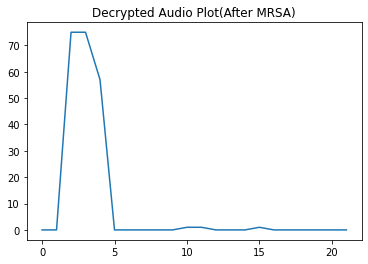

In [ ]:
MAX=100000
def multiply(x, res, res_size):
  carry = 0
  for i in range(res_size):
          prod = res[i] * x + carry
          res[i] = prod % 10
          carry = prod // 10
  while (carry):
         res[res_size] = carry % 10
         carry = carry // 10
         res_size+=1
  return res_size

  def power(x,n):
        if (n == 0) :
               print("1")
               return
        res=[0 for i in range(MAX)]
        res_size = 0
        temp = x
# Initialize result
        while (temp != 0):
              res[res_size] = temp % 10;
              res_size+=1
              temp = temp // 10
        for i in range(2, n + 1):
              res_size = multiply(x, res, res_size)
        print(x , "^" , n , " = ",end="")
        for i in range(res_size - 1, -1, -1):
               print(res[i], end="")


decrypted = (data**d)%n
plt.plot(decrypted)
print(decrypted)
plt.title('Decrypted Audio Plot(After MRSA)')


writing the decrypted file into an audio file

In [ ]:
encrypted = np.asarray(encrypted,dtype=np.int16)
wavfile.write('decrypted.wav',fs,encrypted)
print("A file titled 'decrypted.wav' is generated which is analog of the audio")

A file titled 'decrypted.wav' is generated which is analog of the audio


In [ ]:
with open('encrypted_audio_file.wav', 'rb') as fd:
 contents = fd.read()
 print(contents)

b'u\x82\xa2\x08\xcdI\x1a\xca\xe1\xb3\xd9\xda\xed\xbf\x8e'


In [ ]:
import os
from Crypto.Cipher import AES

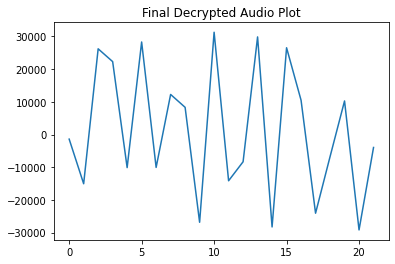

In [ ]:
import wave
from Crypto.Cipher import AES
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the AES key and initialization vector (IV)
AES_KEY = "Pw1iOaLMLGJNHPt6"
AES_IV = os.urandom(16)

# Open the encrypted .wav file
with wave.open('decrypted.wav', 'rb') as encrypted_wav:
    # Read the encrypted data from the .wav file
    encrypted_data = encrypted_wav.readframes(encrypted_wav.getnframes())

# Create an AES decryption object with the key and IV
decryptor = AES.new(AES_KEY.encode("utf-8"), AES.MODE_CFB, AES_IV)

decrypted_audio = decryptor.decrypt(contents_bytes)
#decryptor = AES.new(AES_KEY, AES.MODE_CBC, AES_IV)

# Decrypt the data
decrypted_data = decryptor.decrypt(encrypted_data)

# Convert the decrypted data to a numpy array
audio_data = np.frombuffer(decrypted_data, dtype=np.int16)

# Plot the audio data
plt.plot(audio_data)
plt.title("Final Decrypted Audio Plot")
plt.show()
